In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PM_map = pd.read_csv('data2/a1/PM_map.csv')

PM_map

,รหัสสถานี,ชื่อสถานี,รายละเอียดจุดติดตั้งสถานี,จังหวัด,english_name,adm1__id
0,02T,แขวงหิรัญรูจี เขตธนบุรี กทม.,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,กทม.,Bangkok Metropolis,3.0
1,05T,แขวงบางนา เขตบางนา กทม.,กรมอุตุนิยมวิทยา,กทม.,Bangkok Metropolis,3.0
2,10T,แขวงคลองจั่น เขตบางกะปิ กทม.,เคหะชุมชนคลองจั่น,กทม.,Bangkok Metropolis,3.0
3,11T,แขวงดินแดง เขตดินแดง กทม.,สนามกีฬาเคหะชุมชนห้วยขวาง,กทม.,Bangkok Metropolis,3.0
4,12T,แขวงช่องนนทรี เขตยานนาวา กทม.,โรงเรียนนนทรีวิทยา,กทม.,Bangkok Metropolis,3.0
...,...,...,...,...,...,...
91,63T,ต.สะเตง อ.เมือง จ.ยะลา,สวนสาธารณะสนามโรงพิธีช้างเผือก ยะลา,จ.ยะลา,Yala,76.0
92,78T,ต.เบตง อ.เบตง จ.ยะลา,ศูนย์พัฒนาเด็กเล็กเทศบาลเมืองเบตง,จ.ยะลา,Yala,76.0
93,80T,ต.พิมาน อ.เมือง. จ.สตูล,ศาลากลางจังหวัดสตูล,จ.สตูล,Satun,61.0
94,89T,ต.คลัง อ.เมือง จ.นครศรีธรรมราช,ศูนย์ฟื้นฟูสุขภาพผู้สูงอายุ,จ.นครศรีธรรมราช,Nakhon Si Thammarat,31.0


In [4]:
indicator = pd.read_csv('data2/a1/indicator.csv')

indicator

,province_name,province_lat,province_lon,English_name,AREA
0,กรุงเทพมหานคร,13.727896,100.524123,Bangkok Metropolis,1571.371336
1,กาญจนบุรี,14.022780,99.532811,Kanchanaburi,19450.911388
2,ขอนแก่น,16.441935,102.835992,Khon Kaen,10612.202446
3,ชลบุรี,13.361143,100.984672,Chon Buri,4504.763605
4,เชียงใหม่,18.787748,98.993131,Chiang Mai,22176.037103
5,ภูเก็ต,7.981050,98.363882,Phuket,548.025456


In [5]:
adm1_list = [3,16,17,12,10,48]
indicator['adm1'] = pd.Series(adm1_list)

indicator

,province_name,province_lat,province_lon,English_name,AREA,adm1
0,กรุงเทพมหานคร,13.727896,100.524123,Bangkok Metropolis,1571.371336,3
1,กาญจนบุรี,14.022780,99.532811,Kanchanaburi,19450.911388,16
2,ขอนแก่น,16.441935,102.835992,Khon Kaen,10612.202446,17
3,ชลบุรี,13.361143,100.984672,Chon Buri,4504.763605,12
4,เชียงใหม่,18.787748,98.993131,Chiang Mai,22176.037103,10
5,ภูเก็ต,7.981050,98.363882,Phuket,548.025456,48


In [6]:
from math import radians, cos, sin, sqrt, asin

def is_within_radius(lat, lon, center_lat, center_lon, radius_km=70):
    # แปลงองศาเป็นเรเดียน
    lat, lon, center_lat, center_lon = map(radians, [lat, lon, center_lat, center_lon])

    # คำนวณระยะทางด้วย haversine formula
    dlon = lon - center_lon
    dlat = lat - center_lat
    a = sin(dlat/2)**2 + cos(center_lat) * cos(lat) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  
    distance = r * c

    # ตรวจสอบระยะทาง
    return distance <= radius_km


In [7]:
fire_achive_raw = pd.read_csv('data1/FIRM-NASA-fire-alert-data/DL_FIRE_M-C61_2000-2025/fire_archive_M-C61_1_11_2000-30_11_2024.csv')

fire_achive_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650623 entries, 0 to 650622
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    650623 non-null  float64
 1   longitude   650623 non-null  float64
 2   brightness  650623 non-null  float64
 3   scan        650623 non-null  float64
 4   track       650623 non-null  float64
 5   acq_date    650623 non-null  object 
 6   acq_time    650623 non-null  int64  
 7   satellite   650623 non-null  object 
 8   instrument  650623 non-null  object 
 9   confidence  650623 non-null  int64  
 10  version     650623 non-null  float64
 11  bright_t31  650623 non-null  float64
 12  frp         650623 non-null  float64
 13  daynight    650623 non-null  object 
 14  type        650623 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 74.5+ MB


In [8]:
fire_achive_raw['acq_date'] = pd.to_datetime(fire_achive_raw['acq_date'], format='%Y-%m-%d')

fire_achive_raw['day'] = fire_achive_raw['acq_date'].dt.day
fire_achive_raw['month'] = fire_achive_raw['acq_date'].dt.month
fire_achive_raw['year'] = fire_achive_raw['acq_date'].dt.year

fire_achive = fire_achive_raw[(fire_achive_raw['year'] >= 2014) & (fire_achive_raw['year'] <= 2024)]

In [51]:
PM2_5 = pd.read_csv('data1/pm2-5/combined_pm2.5_2011_2024_daily_microgramperm3.csv')

PM2_5['Date'] = pd.to_datetime(PM2_5['Date'])

PM2_5['Year'] = PM2_5['Date'].dt.year

PM2_5 = PM2_5[(PM2_5['Year'] >= 2014) & (PM2_5['Year'] <= 2024)]

PM2_5

,Date,02T,05T,10T,11T,12T,59T,61T,03T,50T,...,61T,52T,08T,27T,77T,70T*,70T**,72T(เก่า),72T(ใหม่),Year
0,2024-12-31,37.1,33.9,32.9,30.0,30.1,21.9,29.5,32.5,34.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
1,2024-12-30,40.0,28.4,28.2,28.4,28.1,26.2,27.1,34.3,33.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
2,2024-12-29,25.8,20.1,20.4,20.6,20.7,17.0,20.1,22.3,23.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
3,2024-12-28,28.2,22.9,22.5,22.8,23.4,17.0,22.6,25.6,28.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
4,2024-12-27,47.4,35.4,35.8,35.4,35.9,23.2,34.6,43.9,41.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
4014,2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
4015,2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
4016,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014


In [ ]:
# Extract Fire Achive Chiang Mai data
fire_achive_chiang_mai = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 18.787748, 98.993131),
        axis=1
    )
]

fire_achive_chiang_mai['adm1'] = 10

fire_achive_chiang_mai

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30728\3055857968.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_chiang_mai['adm1'] = 10


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
392255,18.3132,99.3198,313.2,1.1,1.0,2014-01-02,654,Aqua,MODIS,64,6.03,299.8,6.4,D,0,2,1,2014,10
392472,18.6576,98.3805,310.3,1.1,1.1,2014-01-04,642,Aqua,MODIS,63,6.03,298.7,6.5,D,0,4,1,2014,10
392475,18.6965,98.3358,307.3,1.8,1.3,2014-01-04,1607,Terra,MODIS,71,6.03,286.7,22.9,N,0,4,1,2014,10
392476,18.6959,98.3361,300.0,1.6,1.3,2014-01-04,1854,Aqua,MODIS,13,6.03,285.2,12.2,N,0,4,1,2014,10
392478,18.6910,98.3391,316.5,1.2,1.1,2014-01-05,418,Terra,MODIS,75,6.03,295.8,16.2,D,0,5,1,2014,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649349,18.7607,98.3344,305.6,1.0,1.0,2024-05-14,1508,Terra,MODIS,65,61.03,287.7,6.7,N,0,14,5,2024,10
649433,18.4340,99.5285,321.5,1.4,1.2,2024-05-19,703,Aqua,MODIS,61,61.03,299.3,11.7,D,0,19,5,2024,10
649907,18.2750,99.3549,317.2,1.4,1.2,2024-09-27,714,Aqua,MODIS,71,61.03,295.0,13.8,D,0,27,9,2024,10
649908,18.8172,99.6372,309.6,1.3,1.1,2024-09-27,714,Aqua,MODIS,47,61.03,294.0,5.5,D,0,27,9,2024,10


In [52]:
# Extract PM2.5 Chiang Mai data
PM_chiang_mai_raw = PM_map[PM_map['adm1__id'] == 10]

stations = list(PM_chiang_mai_raw['รหัสสถานี'])
stations.append('Date')

PM_chiang_mai = PM2_5.loc[:,stations]

PM_chiang_mai['adm1'] = 10

PM_chiang_mai

,35T,36T,Date,adm1
0,26.6,21.5,2024-12-31,10
1,27.3,23.1,2024-12-30,10
2,24.2,20.1,2024-12-29,10
3,22.8,17.4,2024-12-28,10
4,27.3,23.6,2024-12-27,10
...,...,...,...,...
4013,NaN,47.0,2014-01-05,10
4014,NaN,42.0,2014-01-04,10
4015,NaN,45.0,2014-01-03,10
4016,NaN,39.0,2014-01-02,10


In [61]:
# Merge Chon Buri Dataframe
chiang_mai_df = pd.merge(
    fire_achive_chiang_mai,
    PM_chiang_mai,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

chiang_mai_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,frp,daynight,type,day,month,year,adm1,35T,36T,Date
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10,26.6,21.5,2024-12-31
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10,27.3,23.1,2024-12-30
2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10,24.2,20.1,2024-12-29
3,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10,22.8,17.4,2024-12-28
4,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10,27.3,23.6,2024-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12230,18.6965,98.3358,307.3,1.8,1.3,2014-01-04,1607.0,Terra,MODIS,71.0,...,22.9,N,0.0,4.0,1.0,2014.0,10,NaN,42.0,2014-01-04
12231,18.6959,98.3361,300.0,1.6,1.3,2014-01-04,1854.0,Aqua,MODIS,13.0,...,12.2,N,0.0,4.0,1.0,2014.0,10,NaN,42.0,2014-01-04
12232,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,45.0,2014-01-03
12233,18.3132,99.3198,313.2,1.1,1.0,2014-01-02,654.0,Aqua,MODIS,64.0,...,6.4,D,0.0,2.0,1.0,2014.0,10,NaN,39.0,2014-01-02


In [ ]:
# Extract Fire Achive Bangkok data
fire_achive_bangkok = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 13.727896, 100.524123),
        axis=1
    )
]

fire_achive_bangkok['adm1'] = 3

fire_achive_bangkok

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30728\4112935820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_bangkok['adm1'] = 3


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
392232,13.7322,100.7787,314.2,1.1,1.1,2014-01-02,653,Aqua,MODIS,34,6.03,301.3,4.5,D,2,2,1,2014,3
392234,13.9262,100.8567,312.3,1.2,1.1,2014-01-02,653,Aqua,MODIS,38,6.03,301.4,5.8,D,0,2,1,2014,3
392412,14.2000,100.9333,319.4,1.0,1.0,2014-01-04,641,Aqua,MODIS,70,6.03,304.4,8.9,D,0,4,1,2014,3
392423,13.6156,99.9770,312.1,1.1,1.0,2014-01-04,641,Aqua,MODIS,47,6.03,301.7,4.9,D,0,4,1,2014,3
392429,14.0991,100.8072,312.6,1.0,1.0,2014-01-04,641,Aqua,MODIS,48,6.03,302.2,4.5,D,0,4,1,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650401,14.0204,100.4826,311.2,1.2,1.1,2024-11-21,252,Terra,MODIS,59,61.03,293.2,5.6,D,0,21,11,2024,3
650406,13.6093,100.3137,303.6,1.3,1.1,2024-11-21,2003,Aqua,MODIS,56,61.03,291.5,6.0,N,2,21,11,2024,3
650485,13.9731,100.8015,313.9,1.0,1.0,2024-11-28,734,Aqua,MODIS,59,61.03,297.5,5.1,D,0,28,11,2024,3
650550,14.0747,100.6482,321.6,1.5,1.2,2024-11-30,715,Aqua,MODIS,76,61.03,297.8,19.0,D,2,30,11,2024,3


In [53]:
# Extract PM2.5 Bangkok data
PM_bangkok_raw = PM_map[PM_map['adm1__id'] == 3]

stations = list(PM_bangkok_raw['รหัสสถานี'])
stations.append('Date')

PM_bangkok = PM2_5.loc[:,stations]

PM_bangkok['adm1'] = 3

PM_bangkok

,02T,05T,10T,11T,12T,59T,61T,03T,50T,52T,53T,54T,Date,adm1
0,37.1,33.9,32.9,30.0,30.1,21.9,29.5,32.5,34.1,36.9,34.1,34.9,2024-12-31,3
1,40.0,28.4,28.2,28.4,28.1,26.2,27.1,34.3,33.2,39.2,32.7,33.4,2024-12-30,3
2,25.8,20.1,20.4,20.6,20.7,17.0,20.1,22.3,23.8,25.2,23.6,23.3,2024-12-29,3
3,28.2,22.9,22.5,22.8,23.4,17.0,22.6,25.6,28.2,27.8,27.9,27.7,2024-12-28,3
4,47.4,35.4,35.8,35.4,35.9,23.2,34.6,43.9,41.6,46.2,40.0,44.5,2024-12-27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-05,3
4014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-04,3
4015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-03,3
4016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-02,3


In [ ]:
# Merge Bangkok Dataframe
bangkok_df = pd.merge(
    fire_achive_bangkok,
    PM_bangkok,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

bangkok_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,11T,12T,59T,61T,03T,50T,52T,53T,54T,Date
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,30.0,30.1,21.9,29.5,32.5,34.1,36.9,34.1,34.9,2024-12-31
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,28.4,28.1,26.2,27.1,34.3,33.2,39.2,32.7,33.4,2024-12-30
2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,20.6,20.7,17.0,20.1,22.3,23.8,25.2,23.6,23.3,2024-12-29
3,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,22.8,23.4,17.0,22.6,25.6,28.2,27.8,27.9,27.7,2024-12-28
4,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,35.4,35.9,23.2,34.6,43.9,41.6,46.2,40.0,44.5,2024-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,14.1579,100.9587,320.0,1.0,1.0,2014-01-04,641.0,Aqua,MODIS,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-04
7812,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-03
7813,13.7322,100.7787,314.2,1.1,1.1,2014-01-02,653.0,Aqua,MODIS,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-02
7814,13.9262,100.8567,312.3,1.2,1.1,2014-01-02,653.0,Aqua,MODIS,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-02


In [ ]:
# Extract Fire Achive Khon Kaen data
fire_achive_khon_kaen = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 16.441935, 102.835992),
        axis=1
    )
]

fire_achive_khon_kaen['adm1'] = 17
fire_achive_khon_kaen

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30728\3069220174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_khon_kaen['adm1'] = 17


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
392154,16.3843,103.1456,315.7,1.8,1.3,2014-01-01,611,Aqua,MODIS,67,6.03,299.8,17.7,D,0,1,1,2014,17
392156,16.7231,103.3677,313.0,1.7,1.3,2014-01-01,611,Aqua,MODIS,64,6.03,298.9,10.7,D,0,1,1,2014,17
392166,16.9041,102.8070,311.9,1.0,1.0,2014-01-02,348,Terra,MODIS,56,6.03,298.4,4.1,D,0,2,1,2014,17
392167,16.8429,102.7820,314.5,1.0,1.0,2014-01-02,348,Terra,MODIS,66,6.03,299.8,6.3,D,0,2,1,2014,17
392170,16.5910,103.0522,316.2,1.0,1.0,2014-01-02,348,Terra,MODIS,68,6.03,299.6,8.1,D,0,2,1,2014,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650527,16.8143,102.7804,310.9,1.8,1.3,2024-11-29,315,Terra,MODIS,69,61.03,282.7,17.1,D,0,29,11,2024,17
650528,16.8136,102.7908,307.6,1.8,1.3,2024-11-29,315,Terra,MODIS,36,61.03,284.3,10.5,D,0,29,11,2024,17
650606,16.1763,103.3580,316.2,1.0,1.0,2024-11-30,716,Aqua,MODIS,64,61.03,301.1,6.6,D,0,30,11,2024,17
650608,16.1941,103.3551,315.3,1.0,1.0,2024-11-30,716,Aqua,MODIS,62,61.03,301.2,6.0,D,0,30,11,2024,17


In [54]:
# Extract PM2.5 Khon Kaen data
PM_khon_kaen_raw = PM_map[PM_map['adm1__id'] == 17]

stations = list(PM_khon_kaen_raw['รหัสสถานี'])
stations.append('Date')

PM_khon_kaen = PM2_5.loc[:,stations]

PM_khon_kaen['adm1'] = 17

PM_khon_kaen

,46T,Date,adm1
0,30.0,2024-12-31,17
1,35.2,2024-12-30,17
2,NaN,2024-12-29,17
3,24.5,2024-12-28,17
4,24.5,2024-12-27,17
...,...,...,...
4013,81.0,2014-01-05,17
4014,64.0,2014-01-04,17
4015,108.0,2014-01-03,17
4016,92.0,2014-01-02,17


In [ ]:
# Merge Khon Kaen Dataframe
khon_kaen_df = pd.merge(
    fire_achive_khon_kaen,
    PM_khon_kaen,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

khon_kaen_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,bright_t31,frp,daynight,type,day,month,year,adm1,46T,Date
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,30.0,2024-12-31
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,35.2,2024-12-30
2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,2024-12-29
3,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,24.5,2024-12-28
4,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,24.5,2024-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10794,16.2686,102.3147,315.6,1.5,1.2,2014-01-02,654.0,Aqua,MODIS,60.0,...,302.8,9.3,D,0.0,2.0,1.0,2014.0,17,92.0,2014-01-02
10795,16.4426,102.7315,315.8,1.6,1.3,2014-01-02,654.0,Aqua,MODIS,63.0,...,301.6,10.9,D,0.0,2.0,1.0,2014.0,17,92.0,2014-01-02
10796,16.5028,102.9433,316.9,1.7,1.3,2014-01-02,654.0,Aqua,MODIS,63.0,...,302.5,11.7,D,0.0,2.0,1.0,2014.0,17,92.0,2014-01-02
10797,16.3843,103.1456,315.7,1.8,1.3,2014-01-01,611.0,Aqua,MODIS,67.0,...,299.8,17.7,D,0.0,1.0,1.0,2014.0,17,83.0,2014-01-01


In [ ]:
# Extract Fire Achive Chon Buri data
fire_achive_chon_buri	 = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 13.361143 , 100.984672),
        axis=1
    )
]

fire_achive_chon_buri['adm1'] = 12

fire_achive_chon_buri

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30728\3465409570.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_chon_buri['adm1'] = 12


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
392229,13.0345,101.0551,331.0,1.2,1.1,2014-01-02,653,Aqua,MODIS,82,6.03,304.3,24.7,D,0,2,1,2014,12
392230,13.0423,100.9686,326.8,1.1,1.1,2014-01-02,653,Aqua,MODIS,78,6.03,303.1,18.8,D,0,2,1,2014,12
392231,13.0409,100.9581,326.0,1.1,1.1,2014-01-02,653,Aqua,MODIS,77,6.03,303.0,17.8,D,0,2,1,2014,12
392232,13.7322,100.7787,314.2,1.1,1.1,2014-01-02,653,Aqua,MODIS,34,6.03,301.3,4.5,D,2,2,1,2014,12
392234,13.9262,100.8567,312.3,1.2,1.1,2014-01-02,653,Aqua,MODIS,38,6.03,301.4,5.8,D,0,2,1,2014,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650381,13.7063,100.6186,321.0,1.1,1.1,2024-11-19,310,Terra,MODIS,73,61.03,299.5,9.5,D,2,19,11,2024,12
650382,13.6988,100.6213,319.7,1.1,1.1,2024-11-19,310,Terra,MODIS,72,61.03,299.5,8.1,D,2,19,11,2024,12
650383,13.2411,101.2905,322.5,1.2,1.1,2024-11-19,310,Terra,MODIS,72,61.03,299.8,17.4,D,0,19,11,2024,12
650384,12.8837,101.1243,310.4,1.2,1.1,2024-11-19,310,Terra,MODIS,51,61.03,292.6,4.8,D,0,19,11,2024,12


In [55]:
# Extract PM2.5 Chon Buri data
PM_chon_buri_raw = PM_map[PM_map['adm1__id'] == 12]

stations = list(PM_chon_buri_raw['รหัสสถานี'])
stations.append('Date')

PM_chon_buri = PM2_5.loc[:,stations]

PM_chon_buri['adm1'] = 12

PM_chon_buri

,32T,33T,34T,Date,adm1
0,20.7,23.9,22.3,2024-12-31,12
1,19.6,23.4,23.0,2024-12-30,12
2,16.8,17.5,15.4,2024-12-29,12
3,15.7,19.0,17.8,2024-12-28,12
4,27.6,25.9,20.7,2024-12-27,12
...,...,...,...,...,...
4013,NaN,NaN,NaN,2014-01-05,12
4014,NaN,NaN,NaN,2014-01-04,12
4015,NaN,NaN,NaN,2014-01-03,12
4016,NaN,NaN,NaN,2014-01-02,12


In [56]:
# Merge Chon Buri Dataframe
chon_buri_df = pd.merge(
    fire_achive_chon_buri,
    PM_chon_buri,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

chon_buri_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,daynight,type,day,month,year,adm1,32T,33T,34T,Date
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12,20.7,23.9,22.3,2024-12-31
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12,19.6,23.4,23.0,2024-12-30
2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12,16.8,17.5,15.4,2024-12-29
3,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12,15.7,19.0,17.8,2024-12-28
4,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12,27.6,25.9,20.7,2024-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6843,13.0423,100.9686,326.8,1.1,1.1,2014-01-02,653.0,Aqua,MODIS,78.0,...,D,0.0,2.0,1.0,2014.0,12,NaN,NaN,NaN,2014-01-02
6844,13.0409,100.9581,326.0,1.1,1.1,2014-01-02,653.0,Aqua,MODIS,77.0,...,D,0.0,2.0,1.0,2014.0,12,NaN,NaN,NaN,2014-01-02
6845,13.7322,100.7787,314.2,1.1,1.1,2014-01-02,653.0,Aqua,MODIS,34.0,...,D,2.0,2.0,1.0,2014.0,12,NaN,NaN,NaN,2014-01-02
6846,13.9262,100.8567,312.3,1.2,1.1,2014-01-02,653.0,Aqua,MODIS,38.0,...,D,0.0,2.0,1.0,2014.0,12,NaN,NaN,NaN,2014-01-02


In [64]:
# Extract Fire Achive Phuket data
fire_achive_phuket	 = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 7.981050 , 98.363882),
        axis=1
    )
]

fire_achive_phuket['adm1'] = 48

fire_achive_phuket

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30728\1562800541.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_phuket['adm1'] = 48


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
392226,8.4187,98.3362,314.6,1.0,1.0,2014-01-02,652,Aqua,MODIS,48,6.03,297.8,6.8,D,0,2,1,2014,48
392655,7.9602,98.5992,312.6,1.2,1.1,2014-01-07,409,Terra,MODIS,50,6.03,294.3,7.6,D,0,7,1,2014,48
393782,8.5787,98.3363,317.1,1.2,1.1,2014-01-18,350,Terra,MODIS,70,6.03,300.5,11.8,D,0,18,1,2014,48
395646,8.2663,98.7495,316.1,1.4,1.2,2014-01-30,415,Terra,MODIS,61,6.03,298.7,15.1,D,0,30,1,2014,48
398937,8.2004,98.9011,310.3,1.0,1.0,2014-02-16,1546,Terra,MODIS,80,6.03,294.9,7.9,N,0,16,2,2014,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646325,8.2197,98.3646,321.1,1.7,1.3,2024-04-18,708,Aqua,MODIS,67,61.03,301.1,21.7,D,0,18,4,2024,48
646326,8.2172,98.3495,321.0,1.7,1.3,2024-04-18,708,Aqua,MODIS,58,61.03,302.3,20.9,D,0,18,4,2024,48
649514,8.0075,98.3110,316.3,1.1,1.0,2024-06-06,324,Terra,MODIS,59,61.03,296.8,5.8,D,0,6,6,2024,48
649554,8.0700,98.8554,303.8,1.4,1.2,2024-06-13,1953,Aqua,MODIS,55,61.03,291.9,5.9,N,0,13,6,2024,48


In [65]:
# Extract PM2.5 Khon Kaen data
PM_phuket_raw = PM_map[PM_map['adm1__id'] == 48]

stations = list(PM_phuket_raw['รหัสสถานี'])
stations.append('Date')

PM_phuket = PM2_5.loc[:,stations]

PM_phuket['adm1'] = 48

PM_phuket

,43T,Date,adm1
0,15.6,2024-12-31,48
1,13.7,2024-12-30,48
2,10.1,2024-12-29,48
3,9.8,2024-12-28,48
4,12.4,2024-12-27,48
...,...,...,...
4013,NaN,2014-01-05,48
4014,NaN,2014-01-04,48
4015,NaN,2014-01-03,48
4016,NaN,2014-01-02,48


In [66]:
# Merge Phuket Dataframe
phuket_df = pd.merge(
    fire_achive_phuket,
    PM_phuket,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

phuket_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,bright_t31,frp,daynight,type,day,month,year,adm1,43T,Date
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,15.6,2024-12-31
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,13.7,2024-12-30
2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,10.1,2024-12-29
3,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,9.8,2024-12-28
4,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,12.4,2024-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,2014-01-05
4054,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,2014-01-04
4055,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,2014-01-03
4056,8.4187,98.3362,314.6,1.0,1.0,2014-01-02,652.0,Aqua,MODIS,48.0,...,297.8,6.8,D,0.0,2.0,1.0,2014.0,48,NaN,2014-01-02


In [63]:
# Extract Fire Achive Phuket data
fire_achive_kanchanaburi = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 14.022780 , 99.532811),
        axis=1
    )
]

fire_achive_kanchanaburi['adm1'] = 16

fire_achive_kanchanaburi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30728\3836815329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_kanchanaburi['adm1'] = 16


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
392139,14.0743,99.8167,310.1,3.6,1.8,2014-01-01,611,Aqua,MODIS,58,6.03,295.7,29.7,D,0,1,1,2014,16
392140,14.0826,99.8111,308.8,3.6,1.8,2014-01-01,611,Aqua,MODIS,52,6.03,295.8,25.0,D,0,1,1,2014,16
392143,14.5562,99.4416,313.6,3.8,1.8,2014-01-01,611,Aqua,MODIS,65,6.03,295.2,49.7,D,0,1,1,2014,16
392144,14.5630,99.4361,310.7,3.8,1.8,2014-01-01,611,Aqua,MODIS,50,6.03,295.5,34.9,D,0,1,1,2014,16
392147,14.6413,99.4489,312.4,3.8,1.8,2014-01-01,611,Aqua,MODIS,62,6.03,295.5,45.0,D,0,1,1,2014,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650144,14.3938,99.7485,317.1,1.4,1.2,2024-10-29,718,Aqua,MODIS,31,61.03,296.2,10.6,D,0,29,10,2024,16
650222,14.4135,99.5821,301.1,1.0,1.0,2024-11-09,304,Terra,MODIS,30,61.03,276.6,2.8,D,0,9,11,2024,16
650304,13.5674,99.7511,314.0,1.0,1.0,2024-11-14,307,Terra,MODIS,64,61.03,298.8,5.7,D,0,14,11,2024,16
650420,14.0470,99.2547,309.2,1.1,1.0,2024-11-23,732,Aqua,MODIS,56,61.03,289.1,4.4,D,0,23,11,2024,16


In [67]:
# Extract PM2.5 Khon Kaen data
PM_kanchanaburi_raw = PM_map[PM_map['adm1__id'] == 16]

stations = list(PM_kanchanaburi_raw['รหัสสถานี'])
stations.append('Date')

PM_kanchanaburi = PM2_5.loc[:,stations]

PM_kanchanaburi['adm1'] = 16

PM_kanchanaburi

,79T,Date,adm1
0,34.4,2024-12-31,16
1,24.7,2024-12-30,16
2,24.4,2024-12-29,16
3,28.6,2024-12-28,16
4,NaN,2024-12-27,16
...,...,...,...
4013,NaN,2014-01-05,16
4014,NaN,2014-01-04,16
4015,NaN,2014-01-03,16
4016,NaN,2014-01-02,16


In [68]:
# Merge Phuket Dataframe
kanchanaburi_df = pd.merge(
    fire_achive_kanchanaburi,
    PM_kanchanaburi,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

kanchanaburi_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,bright_t31,frp,daynight,type,day,month,year,adm1,79T,Date
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,34.4,2024-12-31
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,24.7,2024-12-30
2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,24.4,2024-12-29
3,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,28.6,2024-12-28
4,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,2024-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10206,14.5562,99.4416,313.6,3.8,1.8,2014-01-01,611.0,Aqua,MODIS,65.0,...,295.2,49.7,D,0.0,1.0,1.0,2014.0,16,NaN,2014-01-01
10207,14.5630,99.4361,310.7,3.8,1.8,2014-01-01,611.0,Aqua,MODIS,50.0,...,295.5,34.9,D,0.0,1.0,1.0,2014.0,16,NaN,2014-01-01
10208,14.6413,99.4489,312.4,3.8,1.8,2014-01-01,611.0,Aqua,MODIS,62.0,...,295.5,45.0,D,0.0,1.0,1.0,2014.0,16,NaN,2014-01-01
10209,13.7797,99.5106,305.7,1.1,1.1,2014-01-01,1535.0,Terra,MODIS,65.0,...,288.6,9.5,N,0.0,1.0,1.0,2014.0,16,NaN,2014-01-01


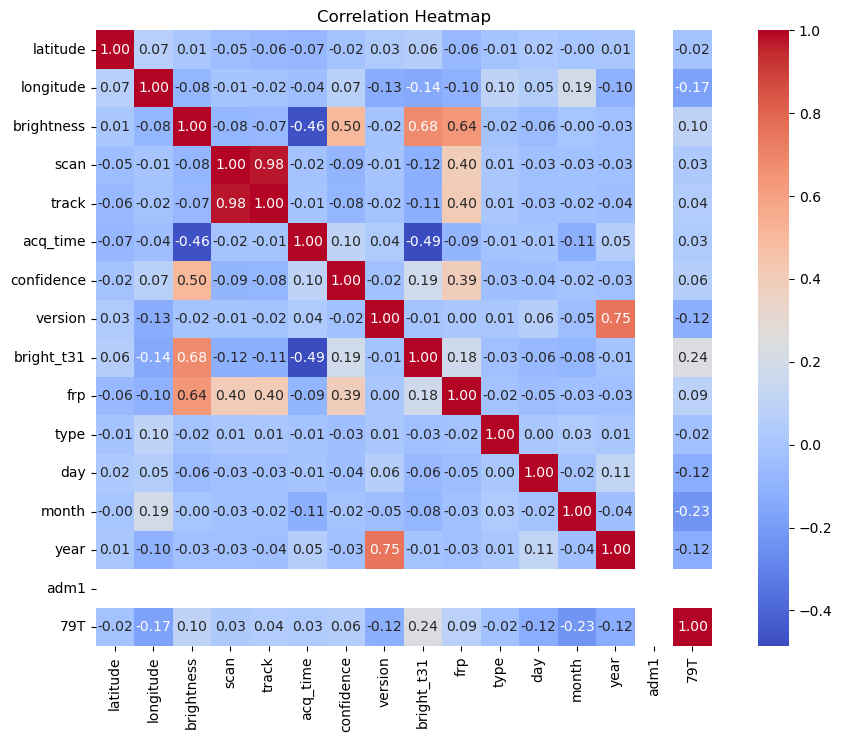

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง correlation matrix
corr = kanchanaburi_df.corr(numeric_only=True)  # เฉพาะ columns ที่เป็นตัวเลข

# วาด heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)

# ตั้งชื่อกราฟ
plt.title('Correlation Heatmap')
plt.show()
